##**Importing libraries and opening the files on Google Colab:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
%matplotlib inline
import seaborn as sns
sns.set(style = "white") #white background style for seaborn plots
sns.set(style = "whitegrid", color_codes = True)
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
! kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 6.38MB/s]


In [ ]:
!unzip "/content/titanic.zip"

unzip:  cannot find or open /content/titanic.zip, /content/titanic.zip.zip or /content/titanic.zip.ZIP.


In [ ]:
%ls

gender_submission.csv  kaggle.json  test.csv  titanic.zip  train.csv


In [ ]:
!rm titanic.zip

In [ ]:
%ls

gender_submission.csv  kaggle.json  test.csv  train.csv


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Kaggle/test.csv")

In [ ]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
test.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


###**Checking possible variables with empty values ​​and filling them:**

In [ ]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
train.isnull().sum() # seeing how many lines of each variable are empty

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####Age variable:

In [ ]:
print(train["Age"].min())
print(train["Age"].max())

0.42
80.0


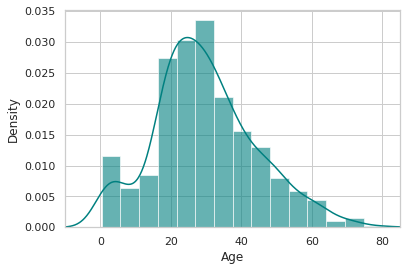

In [ ]:
ax = train["Age"].hist(bins = 15, density = True, stacked = True, color = "teal", alpha = 0.6)
train["Age"].plot(kind = "density", color = "teal")
ax.set(xlabel = "Age")
plt.xlim(-10, 85)
plt.show()

Since "Age" is skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [ ]:
train["Age"].median()

28.0

In [ ]:
train.fillna({"Age" : 28}, inplace = True)

####Cabin variable:

In [ ]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train["Cabin"].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. I'm not using this variable in the model.

In [ ]:
train.drop("Cabin", axis = 1, inplace = True)

####Embarked variable:

In [ ]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train["Embarked"].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


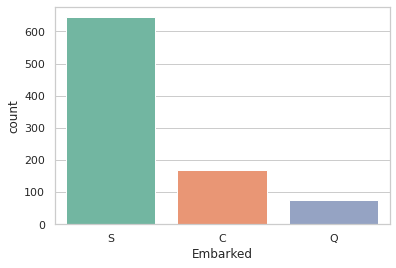

In [ ]:
print("Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(train["Embarked"].value_counts())
sns.countplot(x = "Embarked", data = train, palette = "Set2")
plt.show()

It is reasonable to fill empty values ​​using the mode (most passengers boarded in Southhampton = S).

In [ ]:
train.fillna({"Embarked" : "S"}, inplace = True)

Checking missing values in adjusted train data:

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###**Cleaning repeated variables**

According to the Kaggle data dictionary, both "SibSp" and "Parch" relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [ ]:
train["TravelAlone"] = np.where((train["SibSp"] + train["Parch"]) > 0, 0, 1)
train.drop("SibSp", axis = 1, inplace = True)
train.drop("Parch", axis = 1, inplace = True)

In [ ]:
train["TravelAlone"]

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: TravelAlone, Length: 891, dtype: int64

Logistic regression model doesn't accept non-numerical values. The variables "Pclass", "Embarked", "Sex" will be converted into numeric values. Every variable in them will become a column, and their absence will define as 0, and 1 whether they’re true for that passenger or not.

I will drop "Sex_female" variable because it represents the same values as "Sex_male". I will also drop some unnecessary variables for the model such as "PassengerId", "Name" and "Ticket".

In [ ]:
training = pd.get_dummies(train, columns = ["Pclass", "Embarked", "Sex"])
training.drop("Sex_female", axis = 1, inplace = True)
training.drop("PassengerId", axis = 1, inplace = True)
training.drop("Name", axis = 1, inplace = True)
training.drop("Ticket", axis = 1, inplace = True)

In [ ]:
train = training

In [ ]:
train.head(8)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
5,0,28.0,8.4583,1,0,0,1,0,1,0,1
6,0,54.0,51.8625,1,1,0,0,0,0,1,1
7,0,2.0,21.0750,0,0,0,1,0,0,1,1


**Applying the same changes in the test data as I did for training data:**

I will apply the same input for "Age" in the test data (if missing, Age = 28).


I'll also delet "Cabin" variable from the test data, as I've decided not to include it in my analysis.


There were no missing values in the "Embarked" port variable.


I'll delet the 1 missing value row for "Fare" variable.


I'll add the dummy variables.

I'll drop repeated and unnecessary variables for the model.

In [ ]:
test["Age"].fillna({"Age" : 28}, inplace = True)
test.dropna(subset = ["Fare"], inplace = True)
test.drop("Cabin", axis = 1, inplace = True)

test["TravelAlone"] = np.where((test["SibSp"] + test["Parch"]) > 0, 0, 1)

test.drop("SibSp", axis = 1, inplace = True)
test.drop("Parch", axis = 1, inplace = True)

testing = pd.get_dummies(test, columns = ["Pclass", "Embarked", "Sex"])
testing.drop("Sex_female", axis = 1, inplace = True)
testing.drop("PassengerId", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)
testing.drop("Ticket", axis = 1, inplace = True)

In [ ]:
test = testing

In [ ]:
test.head(8)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0
5,14.0,9.2250,1,0,0,1,0,0,1,1
6,30.0,7.6292,1,0,0,1,0,1,0,0
7,26.0,29.0000,0,0,1,0,0,0,1,1


##**EDA**

###Age

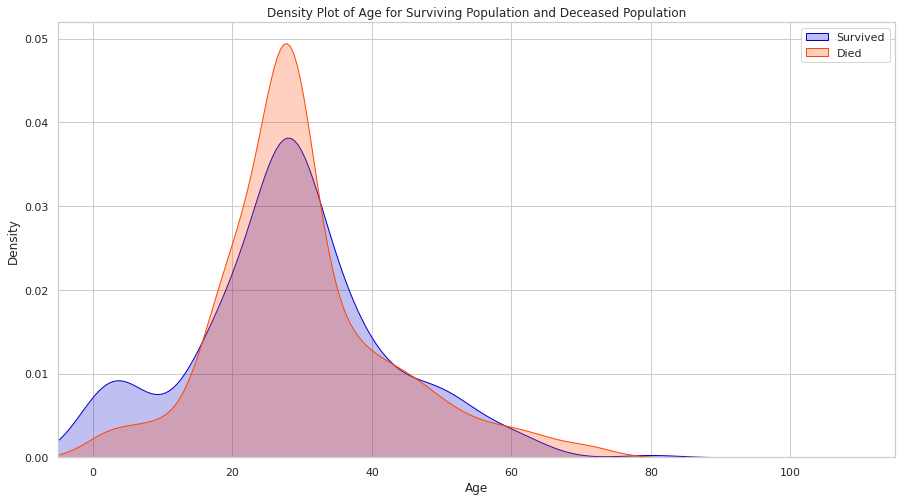

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(train["Age"][train.Survived == 1], color = "mediumblue", shade = True)
sns.kdeplot(train["Age"][train.Survived == 0], color = "orangered", shade = True)
plt.legend(["Survived", "Died"])
plt.title("Density Plot of Age for Surviving Population and Deceased Population")
ax.set(xlabel = "Age")
ax.set(ylabel = "Density")
plt.xlim(-5, 115)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

###Fare

In [ ]:
print(train["Fare"].min())
print(train["Fare"].max())

0.0
512.3292


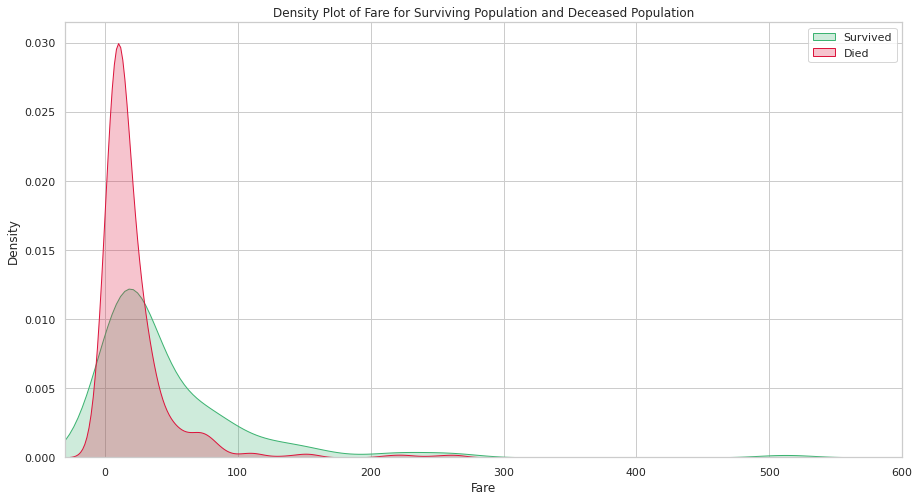

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color = "mediumseagreen", shade = True)
sns.kdeplot(train["Fare"][train.Survived == 0], color = "crimson", shade = True)
plt.legend(["Survived", "Died"])
plt.title("Density Plot of Fare for Surviving Population and Deceased Population")
ax.set(xlabel = "Fare")
ax.set(ylabel = "Density")
plt.xlim(-30, 600)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive.

###Traveling Alone

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


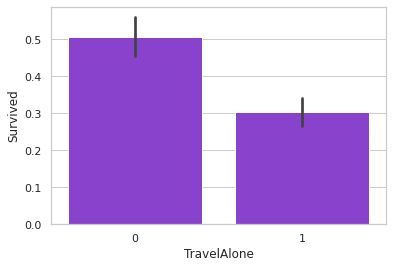

In [ ]:
sns.barplot("TravelAlone", "Survived", data = train, color = "blueviolet")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard.

##**Logistic Regression Model**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
X = train.drop(columns = ["Survived"], axis = 1) # all the variables except Survived
y = train["Survived"] #target variable, Survived

I will divide the dataset into 30% test and 70% training. The random_state parameter must be a fixed number so that, for example, if it is necessary to change any variable in the model, by setting a value it is possible to know if the accuracy (or any other statistics parameter used) has improved because of the changes that were made and not because of a change the randomness of the division.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [ ]:
[[ X_train.shape , y_train.shape ],[ X_test.shape , y_test.shape ]]

[[(623, 10), (623,)], [(268, 10), (268,)]]

**The model will be judged based on the following parameters:**

Accuracy = Number of correct predictions / Total number of predictions.

Accuracy = True Positives + True Negatives / True Positives + False Positives + False Negatives + True Negatives

ﾠ

Precision = Number of positive correct predictions (Died) / Number of predicted labels:

Precisão = True Positives / (True Positives + False Positives)

ﾠ

Recall = Number of positive correct predictions (Died) / Number of actual labels:

Recall = True Positives / (True Positives + False Negatives)

ﾠ

F1 Score = Harmonic Mean of Precision and Recall:

F1 Score = True Positives / (True Positives + 1/2(False postives + False Negatives))

For F1 Score I will use "macro", because the "Survived" data is non-balanced.

ﾠ

Area under the ROC curve: evaluates how well the logistic regression model ranks positive and negative results across all possible cutoffs. It ranges from 0.5 to 1, and the higher the better.

In [ ]:
def confusion_matrix_plot(Y, y):
    plt.figure(figsize = (6, 6))
    data = confusion_matrix(Y, y)
    l = ["Died", "Survived"]
    sns.heatmap(data, annot = True, annot_kws = {"size":18}, fmt = "d", linewidths = .5, cmap = "PiYG", square = True, xticklabels = l, yticklabels = l)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [ ]:
def ROC_curve(Y, y_):
    fpr, tpr, _ = roc_curve(Y, y_)
    _ , ax = plt.subplots()
    ax.plot(fpr, tpr)

    ax.set_title("ROC Curve")
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    plt.show()

In [ ]:
model = LogisticRegressionCV(max_iter = 200, random_state = 30)
model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=200, random_state=30)

In [ ]:
def lr_predict(X, Y):
    y = model.predict(X)
    y_ = model.predict_proba(X)[:, 1]

    print("Accuracy:" , accuracy_score(Y, y))

    print("F1 Score:" , f1_score(Y, y, average = "macro"))

    confusion_matrix_plot(Y, y)

    print(classification_report(Y, y))

    ROC_curve(Y, y_)

    print("Area under the ROC curve is", roc_auc_score(Y, y_))

    return y_

Accuracy: 0.7961476725521669
F1 Score: 0.7813642455476187
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       389
           1       0.74      0.71      0.72       234

    accuracy                           0.80       623
   macro avg       0.78      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623



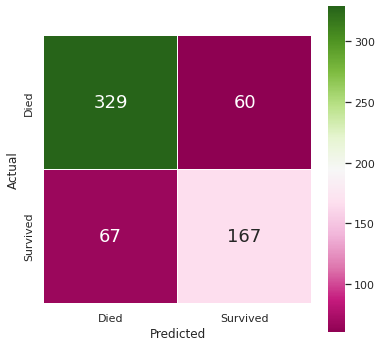

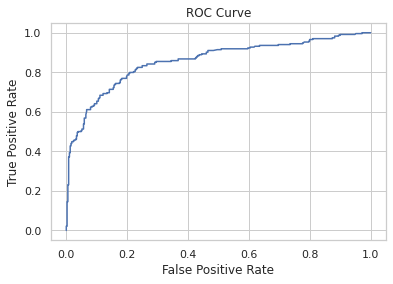

Area under the ROC curve is 0.8564146507591237


array([0.79096781, 0.10341038, 0.09533036, 0.25148526, 0.73017802,
       0.28025852, 0.08368819, 0.17177284, 0.5472019 , 0.10122379,
       0.06125537, 0.11066559, 0.12396023, 0.10824166, 0.09854022,
       0.14580545, 0.61507016, 0.21008887, 0.09188572, 0.05848239,
       0.63142101, 0.52158323, 0.53628869, 0.14483082, 0.1269774 ,
       0.39309098, 0.59179525, 0.84869075, 0.38038097, 0.35275928,
       0.88924302, 0.62799179, 0.68160435, 0.21069601, 0.10434814,
       0.65352826, 0.64986687, 0.10689321, 0.6290327 , 0.50874735,
       0.646473  , 0.09195526, 0.1008794 , 0.53931482, 0.11349159,
       0.92111227, 0.85784872, 0.36711723, 0.91847195, 0.09195526,
       0.10051101, 0.11081808, 0.57613769, 0.66970855, 0.09194072,
       0.17395846, 0.10814492, 0.06597416, 0.23601945, 0.09402727,
       0.07256224, 0.38669697, 0.2331796 , 0.09163872, 0.51661913,
       0.08248788, 0.10510377, 0.09194072, 0.33771203, 0.39514111,
       0.50219694, 0.5930081 , 0.70067629, 0.23135212, 0.52831

In [ ]:
lr_predict(X_train, y_train)

Accuracy: 0.7835820895522388
F1 Score: 0.7696092962589671
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       160
           1       0.77      0.67      0.71       108

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



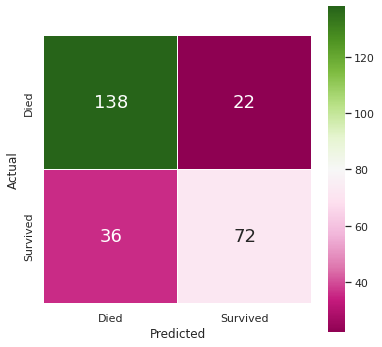

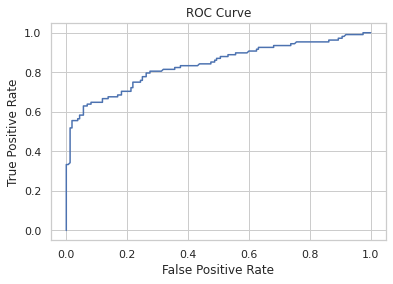

Area under the ROC curve is 0.8377893518518519


array([0.80921349, 0.9436232 , 0.09195526, 0.84229669, 0.12921818,
       0.1186479 , 0.5843996 , 0.10571268, 0.1269774 , 0.09192932,
       0.12568304, 0.39123294, 0.11330183, 0.10581418, 0.86769264,
       0.19825115, 0.10091014, 0.09201305, 0.08568657, 0.80509004,
       0.27651818, 0.09193128, 0.18847964, 0.6085868 , 0.85512544,
       0.06747138, 0.47831958, 0.16506031, 0.09256548, 0.5022946 ,
       0.85932487, 0.75851711, 0.12687725, 0.53931482, 0.09194072,
       0.07787993, 0.87056782, 0.62070545, 0.08186588, 0.6480627 ,
       0.69864142, 0.38172423, 0.1269774 , 0.64574383, 0.78346636,
       0.09995067, 0.39478413, 0.10569621, 0.21136636, 0.44498755,
       0.4129133 , 0.19684045, 0.08980888, 0.85642602, 0.34359968,
       0.8293685 , 0.12698732, 0.10562727, 0.67186622, 0.22349818,
       0.54248928, 0.18675339, 0.28750674, 0.09195526, 0.09194072,
       0.09633712, 0.35982036, 0.36363453, 0.51368011, 0.34103641,
       0.57930523, 0.09194072, 0.27651818, 0.1290454 , 0.57355

In [ ]:
lr_predict(X_test, y_test)

The accuracy of training and testing are similar, which means our model is performing well. The precision, recall, F1 Score and AUC/ROC parameters followed this same behavior.